

# Project: Investigating the The Movie Database Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have chosen to work with the The Movie Database (TMDb) data set. It is a data set containing information about over 10,000 movies released from the year 1960 to 2015. It includes data items such as IMDB ID, movie names, directors, casts, budgets, revenues, run times, popularity measures, and overviews. I plan to explore a couple questions in this report. First, compared to the 1960s, are more movies made now with budgets of one million or more? Then have the number of movies with revenues over one million matched any increase or decrease seen in the budget comparison? *The budget and revenue of the associated movies have been adjusted in terms of 2010 dollars, to account for inflation over time.   
Source for TMDb - https://www.themoviedb.org/ 

<a id='wrangling'></a>
## Data Wrangling

I chose the TMDb dataset and copied the data from https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv. I pasted the data into an excel spreadsheet and saved as a csv. All the data went into one cell so I used the text to columns function to seperate the data items into their own cells based on the comma seperated values. A few of the overviews included commas which pushed other data items into the wrong columns. I put this data back together and shifted the cells back into the proper columns. 

### General Properties

In [54]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [4]:
tmdb_data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
tmdb_data.loc[0:5, 'revenue_adj']

0    1.392446e+09
1    3.481613e+08
2    2.716190e+08
3    1.902723e+09
4    1.385749e+09
5    4.903142e+08
Name: revenue_adj, dtype: float64

When rendering the tmdb_movie_data.csv file I found that the amounts in the revenue_adj column were too large to show completly. Running .dtypes on the file showed that the revenue_adj column was a float. The data is also shown using .loc to only show the column of concern. 

In [6]:
tmdb_data2 = pd.read_csv('tmdb_movie_data2.csv')
display(tmdb_data2.head(4))

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939,1392445893
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939,348161293
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199956,271619025
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919,1902723130


In [7]:
tmdb_data2.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj                int64
revenue_adj               int64
dtype: object

In [8]:
tmdb_data2.loc[0:5, 'revenue_adj']

0    1392445893
1     348161293
2     271619025
3    1902723130
4    1385748801
5     490314247
Name: revenue_adj, dtype: int64

The analysis doesn't require the precision provided by the float numbers. I reformated the cells in the tmdb_data.csv file for the revenue_adj column to whole numbers. Then I renamed the file tmdb_data2.csv. I also changed the budget_adj column to whole numbers for consistency because these columns will be compared. 

In [9]:
tmdb_data2 = tmdb_data2.dropna(how = 'all')

This is to remove any completly empty rows in the data set

In [10]:
tmdb_data2.loc[0:40, 'budget_adj']

0     137999939
1     137999939
2     101199956
3     183999919
4     174799923
5     124199945
6     142599937
7      99359956
8      68079970
9     160999929
10    225399901
11    161919932
12     13799994
13     80959964
14    257599887
15     40479982
16     44159981
17    119599947
18     87399962
19    147199935
20    174799923
21     27599988
22    101199956
23     36799984
24     25759989
25    137999939
26     62559972
27     74519967
28     18399992
29     56119975
30            0
31     45079980
32     26679988
33     36799984
34     53359977
35      5519998
36            0
37    160999929
38     45999980
39     10119996
40     25759989
Name: budget_adj, dtype: int64

The code tmdb_data2.loc[0:40, 'budget_adj'] shows that there are cells in the budget_adj column that do not have a value. These rows need to be removed. 

In [11]:
tmdb_data2.drop(tmdb_data2[tmdb_data2['budget_adj'] < 1].index, inplace = True) 

In [12]:
tmdb_data2.loc[0:40, 'budget_adj']

0     137999939
1     137999939
2     101199956
3     183999919
4     174799923
5     124199945
6     142599937
7      99359956
8      68079970
9     160999929
10    225399901
11    161919932
12     13799994
13     80959964
14    257599887
15     40479982
16     44159981
17    119599947
18     87399962
19    147199935
20    174799923
21     27599988
22    101199956
23     36799984
24     25759989
25    137999939
26     62559972
27     74519967
28     18399992
29     56119975
31     45079980
32     26679988
33     36799984
34     53359977
35      5519998
37    160999929
38     45999980
39     10119996
40     25759989
Name: budget_adj, dtype: int64

Removing the rows that have 0 in the budget_adj column and showing results from the first 40 rows no longer containing 0 values.

In [13]:
tmdb_data2.drop(tmdb_data2[tmdb_data2['revenue_adj'] < 1].index, inplace = True)

Removing the rows that have 0 in the revenue_adj column.


### Data Cleaning - Focusing on Specific Data Points

Before exploring the data to find possible answers to my questions I need to narrow the focus of the data. There are several columns that are not relevant to the analysis I will be performing. The next few sections will show how this data is trimmed.

In [15]:
tmdb_data2.drop(["id", "imdb_id", "popularity", "budget", "revenue", "original_title", "cast",
                 "homepage", "director", "tagline", "keywords", "overview", "runtime", "genres",
                "production_companies", "release_date", "vote_count", "vote_average",], axis = 1, inplace = True)

In [16]:
display(tmdb_data2.head(4))

,release_year,budget_adj,revenue_adj
0,2015,137999939,1392445893
1,2015,137999939,348161293
2,2015,101199956,271619025
3,2015,183999919,1902723130


In the original data set there are two columns each for budget and revenue. The budget_adj and revenue_adj are adjusted for inflation over time. I have chosen to use the adjusted columns. Since I am comparing monetary data over many decades, using the adjusted dollars will provide a more accurate comparison.

I have removed the descriptive columns because identifying each specific movie is not relevant to the questions I have posed. 

I also removed the popularity and voting columns. I think comparing movie popularity against budget and revenue is an interesting data point to inspect but it is beyond the scope of this investigation.


In [88]:
tmdb_budget_data = tmdb_data2.drop(["revenue_adj"], axis = 1, inplace = False)
display(tmdb_budget_data.head(4))

,release_year,budget_adj
0,2015,137999939
1,2015,137999939
2,2015,101199956
3,2015,183999919


This is to trim the data down for the charting of just budgets over the years. I created a new data set so I could still access the revenue data when needed. 

In [127]:
budget_mil_all_yrs = tmdb_budget_data[(tmdb_budget_data.budget_adj > 999999)]
display(budget_mil_all_yrs.head(4))

,release_year,budget_adj
0,2015,137999939
1,2015,137999939
2,2015,101199956
3,2015,183999919


This is to trim the data down even more to just movies with budgets of one million or more.

In [97]:
budget_mil_last10yrs = tmdb_budget_data[(tmdb_budget_data.budget_adj > 999999) & (tmdb_budget_data.release_year > 2005)]
display(budget_mil_last10yrs.head(4))

,release_year,budget_adj
0,2015,137999939
1,2015,137999939
2,2015,101199956
3,2015,183999919


This is to create a data set of budget data that only contains budgets of one million and higher for the years from 2006 to 2015. 

In [98]:
budget_mil_first10yrs = tmdb_budget_data[(tmdb_budget_data.release_year < 1970) & (tmdb_budget_data.budget_adj > 999999)]
display(budget_mil_first10yrs.head(4))

,release_year,budget_adj
9719,1968,75227563
9720,1968,36359989
9724,1968,34479300
9727,1968,20060684


This is to create a data set of budget data that only contains budgets of one million and higher for the years from 1960 to 1965. 

In [109]:
tmdb_revenue_data = tmdb_data2.drop(["budget_adj"], axis = 1, inplace = False)
display(tmdb_revenue_data.head(4))

,release_year,revenue_adj
0,2015,1392445893
1,2015,348161293
2,2015,271619025
3,2015,1902723130


This is to trim the data down for the charting of revenue over the years. I created a new data set so I could still access the budget data when needed. 

In [126]:
revenue_mil_all_yrs = tmdb_revenue_data[(tmdb_revenue_data.revenue_adj > 999999)]
display(revenue_mil_all_yrs.head(4))

,release_year,revenue_adj
0,2015,1392445893
1,2015,348161293
2,2015,271619025
3,2015,1902723130


This is to trim the data down even more to just movies with revenues of one million or more.

In [100]:
revenue_mil_last10yrs = tmdb_revenue_data[(tmdb_revenue_data.revenue_adj > 999999) & (tmdb_revenue_data.release_year > 2005)]
display(revenue_mil_last10yrs.head(4))

,release_year,revenue_adj
0,2015,1392445893
1,2015,348161293
2,2015,271619025
3,2015,1902723130


This is to create a data set of revenue data that only contains revenues of one million and higher for the years 2006 to 2015.

In [111]:
revenue_mil_first10yrs = tmdb_revenue_data[(tmdb_revenue_data.revenue_adj > 999999) & (tmdb_revenue_data.release_year < 1970)]
display(revenue_mil_first10yrs.head(4))

,release_year,revenue_adj
9719,1968,355546597
9720,1968,209354711
9724,1968,265182634
9727,1968,209354711


This is to create a data set of the revenue data that only contains revenues of one million and higher for the years 1960 to 1965.

In [241]:
budget_first10yrs_sum = np.sum(budget_mil_first10yrs.budget_adj)
print (budget_first10yrs_sum)

budget_last10yrs_sum = np.sum(budget_mil_last10yrs.budget_adj)
print (budget_last10yrs_sum)

revenue_first10yrs_sum = np.sum(revenue_mil_first10yrs.revenue_adj)
print (revenue_first10yrs_sum)

revenue_last10yrs_sum = np.sum(revenue_mil_last10yrs.revenue_adj)
print (revenue_last10yrs_sum)

budget_tenyears_list = [budget_first10yrs_sum, budget_last10yrs_sum]
print (budget_tenyears_list)

revenue_tenyears_list = [revenue_first10yrs_sum, revenue_last10yrs_sum]
print (revenue_tenyears_list)

3115325681
74947261249
19751050675
214177649980
[3115325681, 74947261249]
[19751050675, 214177649980]


This is to create the lists of total budgets and revenues for the first and last ten year periods. The lists will be used create pie charts to show the changes in total budgets and revenues between the two periods.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - Are more movies with budgets of one million or higher made now compared to the 1960s? Years included in the data are from 1960 to 2015.

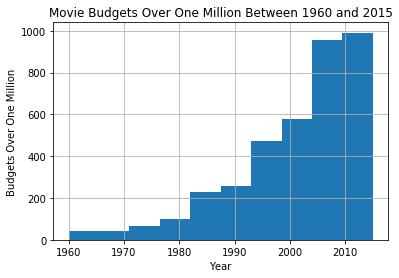

In [129]:
budget_mil_all_yrs.hist('release_year')
plt.title('Movie Budgets Over One Million Between 1960 and 2015')
plt.xlabel('Year')
plt.ylabel('Budgets Over One Million')
plt.show()

This histogram is using the budget data from the tmbd_data2 set which is the cleaned version of all the adjusted movie budgets and revenues in the tmdb_data set. It appears to show the trend toward more movies with million dollar budgets increasing from 1960 and 2015. *The budget and revenue figures used are adjusted for inflation. 

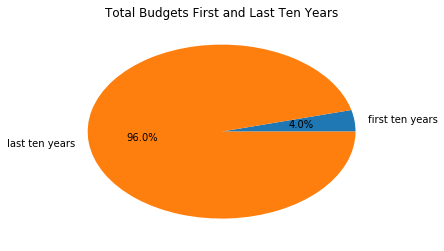

In [232]:
labels = 'first ten years', 'last ten years'
plt.pie(budget_tenyears_list, labels=labels, autopct='%.1f%%')
plt.title('Total Budgets First and Last Ten Years')
plt.show()

This pie chart is calculating the sum of all the budgets over one million in the first ten years of the data set and the last ten years of the data set and then comparing the totals. This does seem to support that there are more movies being made with budgets over one million. But I think the following histograms better support this because they chart the number of movies instead of a total dollar amount of all the movies in each time period.

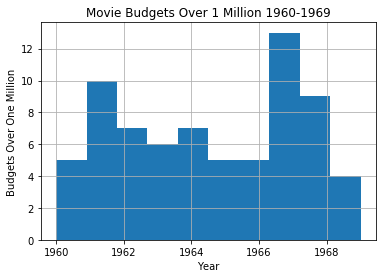

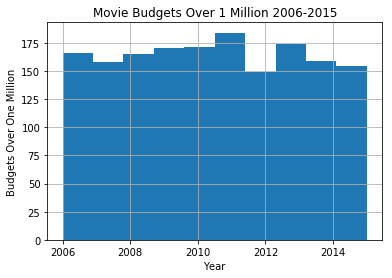

In [144]:
budget_mil_first10yrs.hist('release_year')
plt.title('Movie Budgets Over 1 Million 1960-1969')
plt.xlabel('Year')
plt.ylabel('Budgets Over One Million')
budget_mil_last10yrs.hist('release_year')
plt.title('Movie Budgets Over 1 Million 2006-2015')
plt.xlabel('Year')
plt.ylabel('Budgets Over One Million')
plt.show()

Creating histograms for the first and last ten year spans in the provided data reiterate that movie budgets over one million appear to be more prevelant now. 

In [153]:
np.mean(budget_mil_all_yrs.budget_adj)

45645720.71191432

In [154]:
np.mean(budget_mil_first10yrs.budget_adj)

43877826.49295775

In [155]:
np.mean(budget_mil_last10yrs.budget_adj)

45422582.57515152

Looking at the mean (average) of all the budgets one million and over for years 1960 through 2015 in the data set, which is \\$45,645,720, and comparing it to the means of the first and last ten years of the data set, which are \\$43,877,826 and \\$45,422,582, show that the dollar amounts of budgets have not changed much over the years, based on the data provided and adjusted for inflation. 

### Research Question 2  - Have the number of movies with revenues over one million matched any increase or decrease seen in the budget comparison?

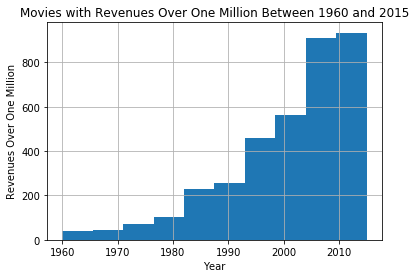

In [189]:
revenue_mil_all_yrs.hist('release_year')
plt.title('Movies with Revenues Over One Million Between 1960 and 2015')
plt.xlabel('Year')
plt.ylabel('Revenues Over One Million')
plt.show()

This histogram is using the revenue data from the tmbd_data2 set which is the cleaned version of all the adjusted movie budgets and revenues in the tmdb_data set. It appears to show the trend of more movies with revenues one million and over in the 2010s compared to the 1960s.

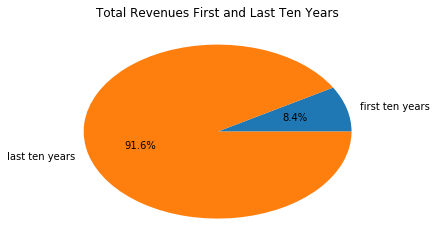

In [237]:
labels = 'first ten years', 'last ten years'
plt.pie(revenue_tenyears_list, labels=labels, autopct='%.1f%%')
plt.title('Total Revenues First and Last Ten Years')
plt.show()

This pie chart showing the percentage of total revenues for the first ten years of the data set compared to the last ten years supports that there has been an increase in revenues. 

Creating histograms for the first and last ten year spans in the provided data reiterate that, like movie budgets,  movie revenues over one million appear to be more prevelant now.

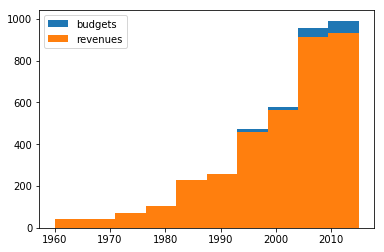

In [161]:
plt.hist(budget_mil_all_yrs.release_year, label='budgets')
plt.hist(revenue_mil_all_yrs.release_year, label='revenues')
plt.legend()
plt.show()

Creating a histogram that overlays all the budget and revenue data from 1960 to 2015 supports my findings that there appears to be an upward trend in movies with both budgets and revenues of one million or more. 

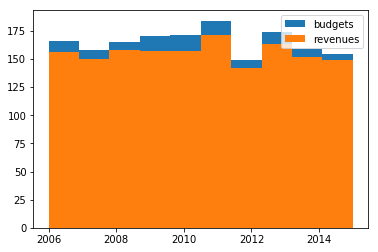

In [160]:
plt.hist(budget_mil_last10yrs.release_year, label='budgets')
plt.hist(revenue_mil_last10yrs.release_year, label='revenues')
plt.legend()
plt.show()

Ploting the last ten years data from the data set for both revenues and budgets together gives a close up view of how closly they are trending. 

<a id='conclusions'></a>
## Conclusions

Through analyzing the TMDb movie data it appears that movies with budgets and revenues of one million or more that are being released has been increasing since the 1960s. This analysis is based only on and limited by the data provided in the TMDb data set. The amounts used over the years have been adjust for inflation based on 2010 dollars.